In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp

from contrastive.utils.models_database import import_bdd

In [4]:
import os

def last_part(path):
    return os.sep.join(path.rsplit(r"/")[-2:])

## Loads summary dataframe

In [23]:
database_path = "/neurospin/dico/jchavas/Runs/57_miccai2023_checks_done_after/Output/contrastive/summary/bdd_HCP-UkBioBank-all-different-n_evaluation-ACCpatterns-1.csv"
bdd = pd.read_csv(database_path, index_col=0)
bdd.loc[bdd.model_path.str.contains("n=1114"),"model_name"] = "cingulate_UkBioBank_n=1101"
bdd.loc[bdd.model_path.str.contains("n=1101"),"model_name"] = "cingulate_UkBioBank_n=1101"
bdd.loc[bdd.model_path.str.contains("UkBioBank"),"dataset_name"] = "UKBioBank"
bdd.loc[bdd.model_path.str.contains("HCP_half_2"),"dataset_name"] = "HCP-2"
bdd.loc[bdd.model_path.str.contains("ACCpatterns"),"dataset_name"] = "ACC-1"
bdd.loc[bdd.model_path.str.contains("top-included"),"dataset_name"] += "-top-included"
bdd.loc[bdd.model_path.str.contains("top-separated"),"dataset_name"] += "-top-separated"

set(bdd.dataset_name)


{'ACC-1',
 'HCP-2-top-included',
 'HCP-2-top-separated',
 'UKBioBank-top-included',
 'UKBioBank-top-separated'}

In [24]:
bdd.sort_values(by='auc', ascending=False, inplace=True)
bdd["model_name"] = "=0"
bdd["model_name"] = bdd.model_path.apply(lambda x: x.split(sep='/')[-2])
bdd["n"] = -1
bdd["n"] = bdd.model_name.apply(lambda x: int(x.split(sep='=')[-1]))
bdd["n"] = bdd.apply(lambda x: x["nb_subjects"] if x["nb_subjects"]>=0 else x["n"], axis=1)
bdd.loc[bdd.n==21072, "n"] = 21070
bdd.loc[bdd.n==1114, "n"] = 1101
set(bdd.model_name)

{'HCP_top-separated-n=1101',
 'HCP_top-separated-n=171',
 'HCP_top-separated-n=300',
 'HCP_top-separated-n=551',
 'convnet-10-n=171',
 'training-on-hcp-2-n=171',
 'training-on-hcp-2-n=20',
 'training-on-hcp-2-n=300',
 'training-on-hcp-2-n=32',
 'training-on-hcp-2-n=551',
 'training-on-hcp-2-n=64',
 'training-on-whole-hcp-n=1101',
 'ukbiobank-n=10000',
 'ukbiobank-n=1101',
 'ukbiobank-n=1114',
 'ukbiobank-n=171',
 'ukbiobank-n=2000',
 'ukbiobank-n=21072',
 'ukbiobank-n=300',
 'ukbiobank-n=5000',
 'ukbiobank-n=551',
 'ukbiobank_without_top-n=21070'}

(0.5, 0.8)

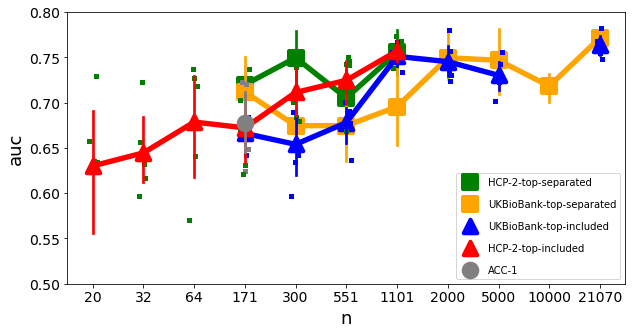

In [27]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(10, 5))
hue_order = ["HCP-2-top-included", "HCP-2-top-excluded", "UKBioBank-top-included", "UKBioBank-top-separated", "ACC-1"]
markers = ['s', 's', '^', '^', 'o']
palette = ['green', 'orange', 'blue', 'red', 'grey']
linestyles = ['-',]*5
sns.pointplot(data=bdd, x=bdd.n, y="auc", 
              palette=palette, markers=markers, linestyles=linestyles, hue_order=hue_order,
              hue='dataset_name',scale=2,ax=ax)
sns.stripplot(data=bdd, x=bdd.n, y="auc", marker='s', palette=palette, 
              hue='dataset_name', hue_order=hue_order, jitter=1, ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:5], labels=labels[0:5], labelspacing=1.2)
ax.set_ylim([0.5,0.8])